In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Motion Data 

- Motion vector between Point Cloud #1 --> Point Cloud #0 (p1 --> p1_r : dx,dy,dz)
- Motion vector between Point Cloud #2 --> Point Cloud #1 (p2 --> p2_r : dx1,dy1,dz1)

We have stored it such that p1 == p2_r

In [3]:
df = pd.read_csv("./motion_1to2.csv")
df

,p1,p1_r,dx,dy,dz,p2,p2_r,dx1,dy1,dz1,dist
0,0,14649,-1,-1,0,4,0,-1,0,0,1.000000
1,1,269,-1,1,-1,16,1,1,0,0,2.449490
2,4,14226,-1,1,0,12,4,0,1,-1,1.414214
3,5,14207,-1,0,1,19,5,0,1,-1,2.449490
4,6,8,0,1,-1,11,6,0,-1,0,2.236068
...,...,...,...,...,...,...,...,...,...,...,...
778462,780182,783167,2,2,0,778253,780182,-1,-1,-3,5.196152
778463,780182,783167,2,2,0,778265,780182,-2,0,-2,4.898979
778464,780183,783170,1,3,-1,778270,780183,-2,0,0,4.358899
778465,780189,778043,3,0,2,778458,780189,0,-2,0,4.123106


In [4]:
df.describe()

,p1,p1_r,dx,dy,dz,p2,p2_r,dx1,dy1,dz1,dist
count,778467.000000,778467.000000,778467.000000,778467.000000,778467.000000,778467.00000,778467.000000,778467.000000,778467.000000,778467.000000,778467.000000
mean,389925.012174,391300.496548,0.156662,0.648597,0.011407,389233.00000,389925.012174,0.220614,0.434766,-0.050322,1.926143
std,226012.224044,227732.103719,1.249845,1.195583,1.686198,224724.21034,226012.224044,1.139593,1.033417,1.525682,0.933196
min,0.000000,0.000000,-7.000000,-6.000000,-10.000000,0.00000,0.000000,-7.000000,-6.000000,-11.000000,0.000000
25%,194450.000000,194428.500000,-1.000000,0.000000,-1.000000,194616.50000,194450.000000,0.000000,0.000000,-1.000000,1.414214
50%,389444.000000,391090.000000,0.000000,1.000000,0.000000,389233.00000,389444.000000,0.000000,0.000000,0.000000,1.732051
75%,585329.000000,587421.000000,1.000000,1.000000,1.000000,583849.50000,585329.000000,1.000000,1.000000,1.000000,2.449490
max,780189.000000,783402.000000,8.000000,7.000000,6.000000,778466.00000,780189.000000,8.000000,7.000000,7.000000,10.049876


In [30]:
df['dd1'] = np.sqrt(df['dx'] * df['dx'] + df['dy'] * df['dy'] + df['dz'] * df['dz'])
df['dd2'] = np.sqrt(df['dx1'] * df['dx1'] + df['dy1'] * df['dy1'] + df['dz1'] * df['dz1'])
df

,p1,p1_r,dx,dy,dz,p2,p2_r,dx1,dy1,dz1,dist,dd1,dd2
0,0,14270,2,-1,0,565253,0,0,1,1,3.000000,2.236068,1.414214
1,1,14259,1,-1,0,565251,1,0,1,1,2.449490,1.414214,1.414214
2,2,14247,1,0,1,565252,2,0,1,1,1.414214,1.414214,1.414214
3,3,14269,1,0,0,565268,3,0,1,2,2.449490,1.000000,2.236068
4,4,14285,0,0,-1,567421,4,2,0,0,2.236068,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557751,701657,727837,-3,-3,0,279290,701657,1,-2,0,4.123106,4.242641,2.236068
557752,701659,727843,-2,-4,0,279329,701659,-2,0,0,4.000000,4.472136,2.000000
557753,701661,728742,-3,-3,0,279291,701661,-1,-2,0,2.236068,4.242641,2.236068
557754,701662,728966,-1,-4,-2,279272,701662,0,-2,0,3.000000,4.582576,2.000000


In [31]:
df[["dist", "dd1", "dd2", "dx", "dy", "dz", "dx1", "dy1", "dz1"]].describe()

,dist,dd1,dd2,dx,dy,dz,dx1,dy1,dz1
count,557756.000000,557756.000000,557756.000000,557756.000000,557756.000000,557756.000000,557756.000000,557756.000000,557756.000000
mean,3.567497,3.309841,2.279915,-0.383483,-1.768938,-0.128605,-0.248282,-0.849940,-0.071268
std,1.582231,1.138840,1.087854,1.561298,1.578048,2.007831,1.262911,1.120041,1.656166
min,0.000000,0.000000,0.000000,-9.000000,-8.000000,-9.000000,-9.000000,-8.000000,-6.000000
25%,2.449490,2.828427,1.732051,-1.000000,-3.000000,-2.000000,-1.000000,-2.000000,-1.000000
50%,3.316625,3.316625,2.236068,0.000000,-2.000000,0.000000,0.000000,-1.000000,0.000000
75%,4.472136,3.741657,2.449490,1.000000,-1.000000,1.000000,0.000000,0.000000,1.000000
max,13.341664,9.949874,9.949874,6.000000,9.000000,9.000000,7.000000,8.000000,9.000000


In [20]:
df_nx = df.drop_duplicates(subset=['p1_r'])
df_nx

,p1,p1_r,dx,dy,dz,p2,p2_r,dx1,dy1,dz1,dist
0,0,14279,1,-1,0,530601,0,0,1,0,2.236068
1,1,14285,0,0,-1,532764,1,0,1,-1,1.000000
2,2,14260,0,0,-1,532766,2,-1,1,0,1.732051
3,4,14259,1,0,-1,532816,4,2,0,0,1.414214
4,6,14319,0,-1,-1,532768,6,0,0,0,1.414214
...,...,...,...,...,...,...,...,...,...,...,...
462601,653804,729842,0,-3,-1,259931,653804,-1,-1,0,2.449490
462602,653807,727858,-1,-3,0,259954,653807,-1,0,-1,3.162278
462603,653809,729869,-2,-3,0,259955,653809,-1,0,-1,3.316625
462604,653815,727835,-1,-2,0,259977,653815,0,0,-1,2.449490


In [4]:
df_test = df_nx[["dist"]]
df_test.plot.hist(bins=10)

NameError: name 'df_nx' is not defined

## Calculate Difference Between Motion Vectors

<AxesSubplot:xlabel='p1'>

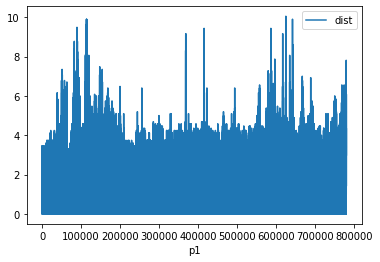

In [5]:
df_extract = df[["p1", "dist"]]
df_extract.plot.line(x="p1", y="dist")

<AxesSubplot:ylabel='Frequency'>

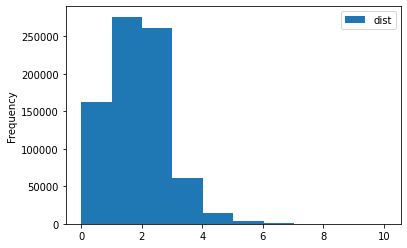

In [7]:
df_test = df[["dist"]]
df_test.plot.hist(bins=10)

We see from the above that majority of the motion vectors have a difference of around 2. This is not a good result since most of our motion vector values are between -1 to 1 (refer to describe output above). 

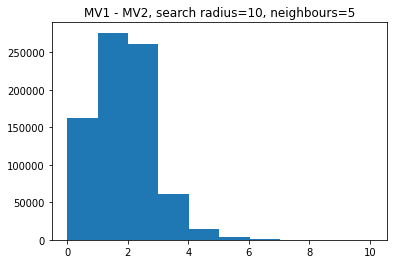

In [9]:
df_test = df[["dist"]]
_ = plt.hist(df_test, bins=10)
plt.title("MV1 - MV2, search radius=10, neighbours=5")
plt.show()

In [38]:
df_good = df[df["dist"] > 10]
df_good

,p1,p1_r,dx,dy,dz,p2,p2_r,dx1,dy1,dz1,dist
26128,58451,26128,-5,1,4,137624,58451,3,-2,-2,10.440307
26147,58455,26147,-4,-1,5,147071,58455,1,-3,-4,10.488088
26148,58455,26148,-3,-1,5,147071,58455,1,-3,-4,10.049876
28004,58455,28004,-3,0,5,147071,58455,1,-3,-4,10.295630
28028,58455,28028,-2,1,6,147071,58455,1,-3,-4,11.180340
...,...,...,...,...,...,...,...,...,...,...,...
732412,377716,756422,-1,-1,-3,167421,377716,-3,0,7,10.246951
732422,378946,756432,2,-3,-2,167904,378946,-4,0,6,10.440307
732455,378982,756465,1,-3,-3,167933,378982,-3,1,6,10.630146
732471,378982,756481,1,-2,-3,167933,378982,-3,1,6,10.295630


<AxesSubplot:ylabel='Frequency'>

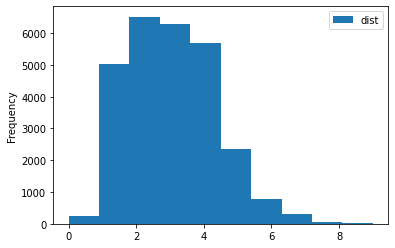

In [26]:
df_test = df[(df['dx'] > 3) | (df['dy'] > 3) | (df['dz'] > 3)]
df_test1 = df_test[['dist']]
df_test1.plot.hist(bins=10)

In [28]:
df_r = df[df['dist'] > 3]
df_r

,p1,p1_r,dx,dy,dz,p2,p2_r,dx1,dy1,dz1,dist
41,41,351558,0,0,-2,54,41,-1,0,1,3.162278
74,74,351607,0,1,-2,106,74,0,0,1,3.162278
80,81,351577,0,1,-2,98,81,-1,1,1,3.162278
81,82,351562,0,1,-2,46,82,-1,0,1,3.316625
82,82,351562,0,1,-2,93,82,0,0,1,3.162278
...,...,...,...,...,...,...,...,...,...,...,...
780175,783392,676871,3,1,0,780158,783392,0,1,2,3.605551
780182,783395,676854,0,2,2,780170,783395,2,2,-1,3.605551
780190,783400,676872,2,2,-1,780159,783400,1,1,2,3.316625
780191,783401,676839,2,2,-1,780150,783401,1,-1,1,3.741657
